<a href="https://colab.research.google.com/github/noorakyyro/NPL/blob/main/NLP_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project

## Sentiment analysis of Elon Musk's tweets¶




### 1. Importing packages

In [ ]:
import pandas as pd 
import numpy as np 
import re
import nltk

#!pip install -U textblob
#!python -m textblob.download_corpora
from textblob import TextBlob


%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 


### 2. Importing and viewing data¶

This dataset is from Kaggle. Find the link: https://www.kaggle.com/datasets/marta99/elon-musks-tweets-dataset-2022/code?resource=download

In [ ]:
# Importing the dataset 

df = pd.read_csv(r'C:\Users\noora\OneDrive\Työpöytä\rawdata.csv')

In [ ]:
# Checking the size of the dataset

df.shape

(3060, 4)

In [ ]:
# Checking whether there are dublicate rows

df.duplicated().sum()

0

In [ ]:
# Viewing the head and tail of the dataset to check that importing worked and what columns the dataset contains. 

df.head()

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32


In [ ]:
df.tail()

,Tweets,Retweets,Likes,Date
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27
3059,CB radios are free from govt/media control,11302,113429,2022-01-27 21:00:09


It seems that there are some parts of the tweets (user handles, emojies, URL-links) that we should get rid of in order to have the best starting place for the sentiment analysis. 

### 3. Cleaning the data

In [ ]:
# Creating a user define function to clean the text
# This is from https://www.kaggle.com/code/rahadmohiuddin/elon-musk-s-tweet-analysis

def clean_text(text):
    #first include all possible emoji in a variable
    emoji=re.compile("["
                     u"\U0001F600-\U0001F64F"    #emoticons
                     u"\U0001F300-\U0001F5FF"    #symbol & pictographs
                     u"\U0001F680-\U0001F6FF"    #transport & map
                     u"\U0001F1E0-\U0001F1FF"    #flags
                     u"\U00002500-\U00002BEF"    #chinese char
                     u"\U00002702-\U000027B0"
                     u"\U000024C2-\U0001F251"
                     u"\U0001f926-\U0001f937"
                     u"\U00010000-\U0010ffff"
                     u"\u2640-\u2642" 
                     u"\u2600-\u2B55"
                     u"\u200d"
                     u"\u23cf"
                     u"\u23e9"
                     u"\u231a"
                     u"\ufe0f"    # dingbats
                     u"\u3030"
                              "]+", re.UNICODE)
    text=re.sub('RT','',text)                       #remove 'RT' from tweets
    text=re.sub('#[A-Za-z0-9]+','',text)            #remove hashtags from tweets
    text=re.sub('\\n','',text)                      #remove \n from the tweets
    text=re.sub('https?://\S+|www\.\S+','',text)    #remove the hyperlinks from the tweets
    text=re.sub('@[\S]*','',text)                   #remove the mentions from the tweets
    text=re.sub('[^\w\s]','',text)                  #remove punctuation from the tweets
    text=re.sub('^[\s]+|[\s]+$','',text)            #remove leading & trailing whitespace from the tweets
    text=re.sub(emoji,'',text)                      #remove the emojis from the tweets
    text=text.lower()
    
    return text

In [ ]:
# Creating a new column for the cleaned tweets

df['Cleaned_tweets'] = df['Tweets'].apply(clean_text)

#Viewing the dataset

df[['Tweets','Cleaned_tweets']]

,Tweets,Cleaned_tweets
0,@PeterSchiff 🤣 thanks,thanks
1,@ZubyMusic Absolutely,absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,dear twitter advertisers
3,@BillyM2k 👻,
4,Meeting a lot of cool people at Twitter today!,meeting a lot of cool people at twitter today
...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,just that manganese is an alternative to iron ...
3056,@incentives101 @ICRicardoLara Exactly,exactly
3057,@ICRicardoLara Your policies are directly resp...,your policies are directly responsible for the...
3058,@ICRicardoLara You should be voted out of office,you should be voted out of office


In [ ]:
# Removing the blank rows

df.drop(df[df["Cleaned_tweets"] == ""].index, inplace = True)

# Checking the results

df.head()

,Tweets,Retweets,Likes,Date,Cleaned_tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting a lot of cool people at twitter today
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,entering twitter hq let that sink in


The tweets for the most part seem to be clean now, so I will move on to the next phase

### 4. Sentiment analysis

For the sentiment analysis I used the package TextBlob. 

The package will give you scores for the polarity and subjectivity. The polarity score ranges from -1 to 1, with -1 being the most negative sentiment and 1 being the most positive statement. The subjectivity score ranges from 0 to 1, with a score of 0
indicating that the statement is factual, whereas a score of 1 refers to a highly subjective statement  

In [ ]:
# Creating functions to get the subjectivity and polarity


# Subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Polarity

def getPolarity(text):
        return TextBlob(text).sentiment.polarity 

In [ ]:
# Creating two new columns to save the results of the created functions 

df["Subjectivity"] = df["Cleaned_tweets"].apply(getSubjectivity)
df["Polarity"] = df["Cleaned_tweets"].apply(getPolarity)

df.head()

,Tweets,Retweets,Likes,Date,Cleaned_tweets,Subjectivity,Polarity
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,0.20
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely,0.90,0.20
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers,0.00,0.00
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting a lot of cool people at twitter today,0.65,0.35
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,entering twitter hq let that sink in,0.00,0.00


In order to make the results easier to comprehend, the tweets will be labelled to be either positive, negative or neutral based on the polarity score.

In [ ]:
# Defining the sentiment classifications 

def getSentiment(value):
    if value < 0:
        return "Negative"
    elif value > 0:
        return "Positive"
    else:
        return "Neutral"

# Creating new column with the Polarity classifications

df["Sentiment"] = df["Polarity"].apply(getSentiment)

df.head(10)

,Tweets,Retweets,Likes,Date,Cleaned_tweets,Subjectivity,Polarity,Sentiment
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.200000,0.200000,Positive
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely,0.900000,0.200000,Positive
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers,0.000000,0.000000,Neutral
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting a lot of cool people at twitter today,0.650000,0.350000,Positive
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,entering twitter hq let that sink in,0.000000,0.000000,Neutral
8,@ARodTV Definitely closer to citizen journalis...,699,10189,2022-10-26 17:05:16,definitely closer to citizen journalism local...,0.333333,0.166667,Positive
9,@sandyleevincent Nobody bats 1000 🤷‍♂️,126,2920,2022-10-26 15:42:50,nobody bats 1000,0.000000,0.000000,Neutral
10,A beautiful thing about Twitter is how it empo...,37951,294406,2022-10-26 15:27:40,a beautiful thing about twitter is how it empo...,0.812500,0.675000,Positive
11,@teslaownersSV I’m a big fan of citizen journa...,488,5529,2022-10-26 15:22:43,im a big fan of citizen journalism,0.100000,0.000000,Neutral
12,“According to unnamed sources close to the mat...,4603,62693,2022-10-26 14:50:58,according to unnamed sources close to the matt...,0.000000,0.000000,Neutral


Determining the mean values of subjectivity and polarity to better understand the data.

In [ ]:
# Subjectivity average 

df["Subjectivity"].mean()

0.3558880457343347

In [ ]:
# Polarity average 

df["Polarity"].mean()

0.12389111816523006

### 5. Analysis

Examining which sentiment is the most common.

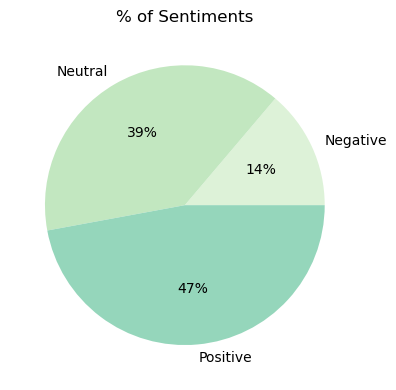

In [ ]:
# Number of Sentiment 

Sentiments_group= df["Polarity"].groupby(df["Sentiment"]).count()

# Plotting a pie chart: Percentage of tweets by Sentiments

labels = Sentiments_group.keys()
plt.figure(figsize=(6,4))
colours = ["coral", "green", "blue"]
colors= sns.color_palette('GnBu')
explode = [0,0,0]
plt.style.use("default")
plt.pie(Sentiments_group,labels=labels,
        colors = colors, 
        explode = explode, autopct = "%1.0f%%")
plt.title("% of Sentiments")
plt.tight_layout()
plt.show()

Determining the actual count of tweets in each of the category.

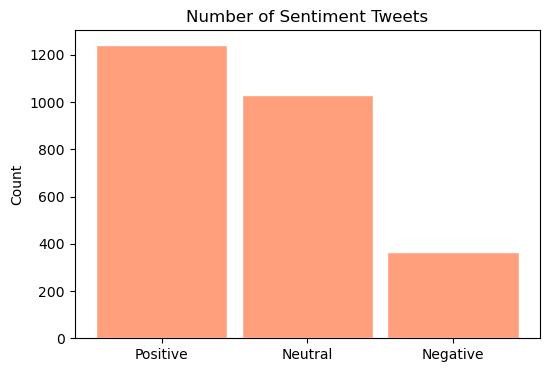

In [ ]:
# Plotting the number of tweets by sentiments

plt.style.use("default")
plt.figure(figsize=(6,4)) 
sns.histplot(df, x = "Sentiment", color = "coral",edgecolor = "white", shrink = 0.9).set(xlabel = None)

plt.title("Number of Sentiment Tweets")
plt.grid(False)
plt.show()

Examination of how does polarity and subjectivity affect engagement (retweets and likes).

In [ ]:
# Creating a new dataframe that combines Retweets and likes for new column called Engagement

df["Engagement"] = df.apply(lambda row: row.Retweets + row.Likes, axis=1)

#Viewing the dataset
df.head()

,Tweets,Retweets,Likes,Date,Cleaned_tweets,Subjectivity,Polarity,Sentiment,Engagement
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,0.20,Positive,7230
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely,0.90,0.20,Positive,27492
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers,0.00,0.00,Neutral,412550
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting a lot of cool people at twitter today,0.65,0.35,Positive,204912
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,entering twitter hq let that sink in,0.00,0.00,Neutral,1189112


[Text(0.5, 1.0, 'Effect of subjectivity and sentiment on engagement')]

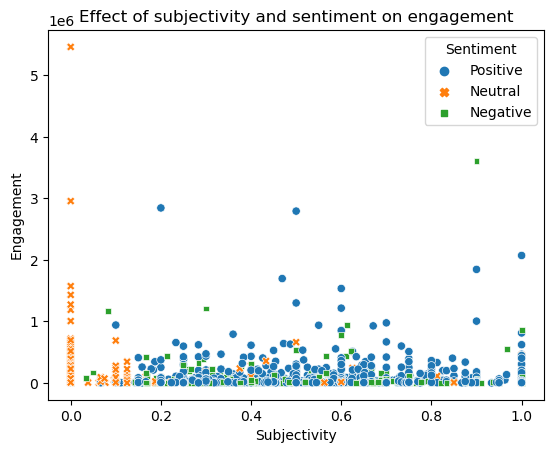

In [ ]:
# Creating a scatterplot of engagement, subjectivity and sentiment

s = sns.scatterplot(data=df, x="Subjectivity", y="Engagement", hue="Sentiment", style="Sentiment")

s.set(title="Effect of subjectivity and sentiment on engagement")

In order to visualize a more clear scatterplot, I will remove some of the outliers

In [ ]:
# Determining what is the highest value of the engagement column

m = df["Engagement"].max()

print(m)

5462494


The maximum value of the Engagement column is 5,462,494

Looking at the above visualization, it seems that removing values over 2,000,000 would get rid of most outliers

In [ ]:
df.drop(df[df["Engagement"] >= 2000000].index, inplace = True)

df.shape

(2631, 9)

[Text(0.5, 1.0, 'Effect of subjectivity and sentiment on engagement')]

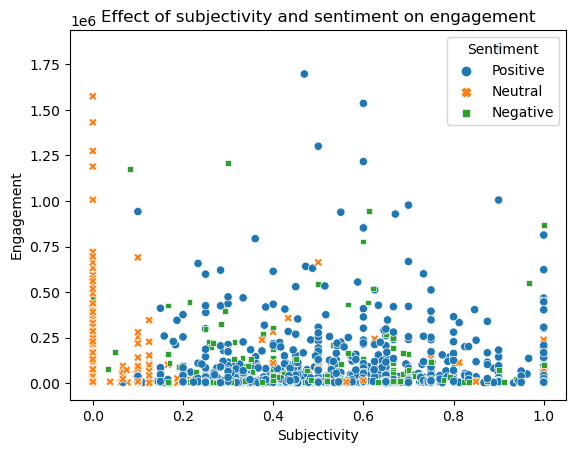

In [ ]:
# Creating a new scatterplot of engagement, subjectivity and sentiment

s = sns.scatterplot(data=df, x="Subjectivity", y="Engagement", hue="Sentiment", style="Sentiment")

s.set(title="Effect of subjectivity and sentiment on engagement")

### 6. Conclusion of findings

This notebook has focused on analyzing the sentiment of Elon Musk's tweets from 2022. The average values (mean) of the subjectivity (0.356) and polarity (0.124) tell us two things. First of all, we can observe that Elon favors objective statements over subjective ones in his tweets. Secondly, as a whole, the tweets contain more positive sentiments than negative ones. 

Examining the final scatter plot gives some additional inside. First of all, it is quite clear to see that tweets that are labeled as neutral, overwhelmingly score lowest on subjectivity. There doesn't seem to be a clear difference in whether positive or negative tweets are more subjective. 

Looking at engagement, it seems that positive tweets seem to generate a little bit more engagement compared to the other two categories. This would be in line with some recent research that has shown that emotionally based content seems to generate higher engagement than factual (neutral) content (Bronstein, 2018, p.554), especially when that emotion is positive (Bene, 2017, p.519). However, it is likely that the results of the scatterplot are skewed based on the share of the different categories in the dataset where positive tweets are 47%, neutral 39%, and negative 14%. Based on this, I don't think that it can be reliably said that the sentiment of Elon's tweets affects the engagement levels.

Finally, it can be observed that there doesn't seem to be a relationship, at least not a strong one, between subjectivity and engagement.

### 7. References

Bene, M. (2017). Go viral on the Facebook! Interactions between candidates and followers on Facebook during the Hungarian general election campaign of 2014. Information, Communication & Society, 20(4), 513-529.

Bronstein, J., Aharony, N., & Bar-Ilan, J. (2018). Politicians’ use of Facebook during elections: Use of emotionally-based discourse, personalization, social media engagement and vividness. Aslib Journal of Information Management.
